![](./img/logo.png)

# Ejemplo D: Regresión Lineal - MultiVariable

$Sci-Kit Learn$ es un poderoso módulo de Python para el aprendizaje de máquina. 
Contiene funciones de regresión, clasificación, agrupación, selección de modelos y reducción de la dimensionalidad. 

El ejemplo se utilizará el módulo <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model</a> que contiene 
"métodos destinados a la regresión en los que se espera que el "Target Value" 
sea una combinación lineal de las variables de entrada".



- Para el ejemplo la variable dependiente ($Target$) es R_SALINITY


## 1.- Se cargan las bibliotecas con sus módulos correspondientes

In [1]:
## Nombre: Geman Daniel Rojas
## Materia: Progrmacion cientifica
##
## Universidad Sergio Arboleda

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

## 2.- Exporación y preparación del conjunto de datos 

In [66]:
data = pd.read_csv('./data/bottle.csv')

In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6937 entries, 0 to 6936
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cst_Cnt              6937 non-null   int64  
 1   Btl_Cnt              6937 non-null   int64  
 2   Sta_ID               6937 non-null   object 
 3   Depth_ID             6937 non-null   object 
 4   Depthm               6937 non-null   int64  
 5   T_degC               6906 non-null   float64
 6   Salnty               6739 non-null   float64
 7   O2ml_L               4591 non-null   float64
 8   STheta               6720 non-null   float64
 9   O2Sat                4460 non-null   float64
 10  Oxy_µmol/Kg          4460 non-null   float64
 11  BtlNum               0 non-null      float64
 12  RecInd               6937 non-null   int64  
 13  T_prec               6906 non-null   float64
 14  T_qual               65 non-null     float64
 15  S_prec               6739 non-null   f

In [68]:
## Se limpian los datos de las columnas sin eliminar filas, dado que se indico por parte del instructor remplazar los
## valores NAN por el promedio de la columna que se encuentren.

elemests =list (enumerate(data.columns))
for index, value in elemests:
    if(data[value].dtype != np.object):
        data[value] = data[value].fillna(0);
        mean = data[value].mean()
        data[value] = data[value].apply(lambda x: mean if(x==0) else x)

In [69]:
data.head() ## Visualizacion Datos Limpios

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,339.50555,10.50,33.440,2.096994,25.649,32.717039,...,0.000562,342.030417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8.00000,10.46,33.440,2.096994,25.656,32.717039,...,0.000562,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10.00000,10.46,33.437,2.096994,25.654,32.717039,...,0.000562,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19.00000,10.45,33.420,2.096994,25.643,32.717039,...,0.000562,19.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20.00000,10.45,33.421,2.096994,25.643,32.717039,...,0.000562,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
data.tail()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
6932,24814,606933,056.0 054.0,19-8705NM-HY-123-0656-05600540-0042A-3,42.0,10.26,32.758,5.79,25.159,90.8,...,0.25,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6933,24814,606934,056.0 054.0,19-8705NM-HY-123-0656-05600540-0050A-7,50.0,9.96,32.885,5.40,25.309,84.2,...,0.28,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6934,24814,606935,056.0 054.0,19-8705NM-HY-123-0656-05600540-0052A-3,52.0,9.91,32.930,5.33,25.352,83.1,...,0.29,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6935,24814,606936,056.0 054.0,19-8705NM-HY-123-0656-05600540-0062A-3,62.0,10.07,33.339,5.62,25.645,88.1,...,1.10,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6936,24814,606937,056.0 054.0,19-8705NM-HY-123-0656-05600540-0071A-3,71.0,9.48,33.552,4.87,25.909,75.5,...,0.87,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.- Visualización de los Datos (Selección de Variables Independientes $features$)
- Dispersión par por variables
- Gráfica de Distribución (Baja distribución "no ayuda a la predición de $Target$")
- Gráfica de Matriz de Correlación (relación con la variable $Target$)

In [47]:
sns.pairplot(data.head(100)) ##Grafico de dipersion y relacion por variables

In [44]:
data.shape

(6937, 74)

/home/droro/Documents/CientificaScripts/env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/droro/Documents/CientificaScripts/env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/droro/Documents/CientificaScripts/env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/droro/Documents/CientificaScripts/env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/droro/Documents/CientificaScripts/env/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kern

/home/droro/Documents/CientificaScripts/env/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  from ipykernel import kernelapp as app


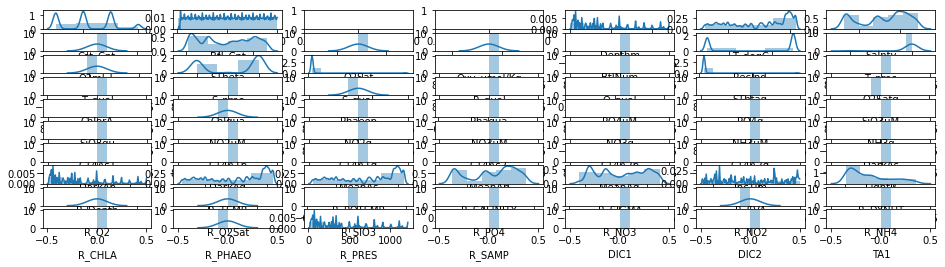

In [51]:
### Visualizar la distribucion de las variables

filas = 10
columnas = 7

fig, ax = plt.subplots(nrows=filas, ncols=columnas, figsize=(16,4))
columna = data.columns
index = 0 

for i in range(filas):
    for j in range (columnas):
        if(data[columna[index]].dtype != np.object):
            sns.distplot(data[columna[index]].head(100), ax = ax[i][j], kde_kws={'bw':0.1})
        index = index+1;
plt.tight_layout()#### ????

In [71]:
matrixCorrelacion = data.corr()
matrixCorrelacion

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
Cst_Cnt,1.000000,0.999586,-0.092612,0.079215,-0.079625,0.006179,-0.083033,0.006664,0.004578,NaN,...,0.223810,-0.092574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Btl_Cnt,0.999586,1.000000,-0.093016,0.079968,-0.079660,0.008228,-0.083493,0.008769,0.006648,NaN,...,0.220408,-0.092977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Depthm,-0.092612,-0.093016,1.000000,-0.810528,0.664055,-0.631908,0.785684,-0.611531,-0.616301,NaN,...,-0.025701,0.999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_degC,0.079215,0.079968,-0.810528,1.000000,-0.584558,0.630650,-0.911881,0.644790,0.616949,NaN,...,0.012426,-0.810361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salnty,-0.079625,-0.079660,0.664055,-0.584558,1.000000,-0.687152,0.841171,-0.674486,-0.691178,NaN,...,-0.039502,0.663570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TA2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
matrixCorrelacion = matrixCorrelacion.fillna(0) ## Se eliminan las columnas que la suma de sus correlaciones sea 0  
for value in matrixCorrelacion.columns:
    s = matrixCorrelacion[value].sum()
    if(s == 0):
        matrixCorrelacion = matrixCorrelacion.drop([value],axis=1)
        

In [76]:
matrixCorrelacion

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
Cst_Cnt,1.000000,0.999586,-0.092612,0.079215,-0.079625,0.006179,-0.083033,0.006664,0.004578,-0.030008,...,-0.097767,0.006179,0.007076,0.244298,-0.062010,0.207948,0.234966,0.254904,0.223810,-0.092574
Btl_Cnt,0.999586,1.000000,-0.093016,0.079968,-0.079660,0.008228,-0.083493,0.008769,0.006648,-0.030266,...,-0.097823,0.008228,0.009247,0.240585,-0.061061,0.204787,0.231394,0.251029,0.220408,-0.092977
Depthm,-0.092612,-0.093016,1.000000,-0.810528,0.664055,-0.631908,0.785684,-0.611531,-0.616301,0.127384,...,0.929080,-0.631908,-0.611280,-0.027934,0.293878,-0.023853,-0.027925,-0.029366,-0.025701,0.999999
T_degC,0.079215,0.079968,-0.810528,1.000000,-0.584558,0.630650,-0.911881,0.644790,0.616949,-0.169341,...,-0.810137,0.630650,0.636686,0.013360,-0.351483,0.008796,0.013177,0.015684,0.012426,-0.810361
Salnty,-0.079625,-0.079660,0.664055,-0.584558,1.000000,-0.687152,0.841171,-0.674486,-0.691178,0.116317,...,0.768841,-0.687152,-0.681333,-0.045309,0.293301,-0.032678,-0.052624,-0.051423,-0.039502,0.663570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TA1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TA2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pH2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
pH1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [79]:
matrixCorrelacion = matrixCorrelacion.fillna(0) ## Se eliminan las filas que la suma  de sus correlaciones sea 0  
for value in matrixCorrelacion.index:
    s = matrixCorrelacion.loc[value,:].sum()
    if(s == 0):
        matrixCorrelacion = matrixCorrelacion.drop([value])
        

In [80]:
matrixCorrelacion ##Obtenemos una matriz de correlacion limpia y util para el estudio

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_CHLA,R_PHAEO,R_PRES
Cst_Cnt,1.000000,0.999586,-0.092612,0.079215,-0.079625,0.006179,-0.083033,0.006664,0.004578,-0.030008,...,-0.097767,0.006179,0.007076,0.244298,-0.062010,0.207948,0.234966,0.254904,0.223810,-0.092574
Btl_Cnt,0.999586,1.000000,-0.093016,0.079968,-0.079660,0.008228,-0.083493,0.008769,0.006648,-0.030266,...,-0.097823,0.008228,0.009247,0.240585,-0.061061,0.204787,0.231394,0.251029,0.220408,-0.092977
Depthm,-0.092612,-0.093016,1.000000,-0.810528,0.664055,-0.631908,0.785684,-0.611531,-0.616301,0.127384,...,0.929080,-0.631908,-0.611280,-0.027934,0.293878,-0.023853,-0.027925,-0.029366,-0.025701,0.999999
T_degC,0.079215,0.079968,-0.810528,1.000000,-0.584558,0.630650,-0.911881,0.644790,0.616949,-0.169341,...,-0.810137,0.630650,0.636686,0.013360,-0.351483,0.008796,0.013177,0.015684,0.012426,-0.810361
Salnty,-0.079625,-0.079660,0.664055,-0.584558,1.000000,-0.687152,0.841171,-0.674486,-0.691178,0.116317,...,0.768841,-0.687152,-0.681333,-0.045309,0.293301,-0.032678,-0.052624,-0.051423,-0.039502,0.663570
O2ml_L,0.006179,0.008228,-0.631908,0.630650,-0.687152,1.000000,-0.705952,0.982953,0.986313,-0.150528,...,-0.655008,1.000000,0.983186,0.048060,-0.357427,0.038078,0.049060,0.052987,0.044716,-0.631654
STheta,-0.083033,-0.083493,0.785684,-0.911881,0.841171,-0.705952,1.000000,-0.723910,-0.709508,0.156420,...,0.868959,-0.705952,-0.720806,-0.027114,0.356910,-0.018488,-0.030405,-0.031444,-0.024038,0.785276
O2Sat,0.006664,0.008769,-0.611531,0.644790,-0.674486,0.982953,-0.723910,1.000000,0.996468,-0.142250,...,-0.652167,0.982953,0.987840,0.045658,-0.346559,0.035558,0.046535,0.050724,0.042541,-0.611258
Oxy_µmol/Kg,0.004578,0.006648,-0.616301,0.616949,-0.691178,0.986313,-0.709508,0.996468,1.000000,-0.139736,...,-0.655014,0.986313,0.985292,0.048878,-0.339381,0.038735,0.049883,0.053875,0.045469,-0.616025
RecInd,-0.030008,-0.030266,0.127384,-0.169341,0.116317,-0.150528,0.156420,-0.142250,-0.139736,1.000000,...,0.133008,-0.150528,-0.145495,-0.022158,0.064139,-0.021666,-0.016700,-0.021851,-0.022401,0.127329


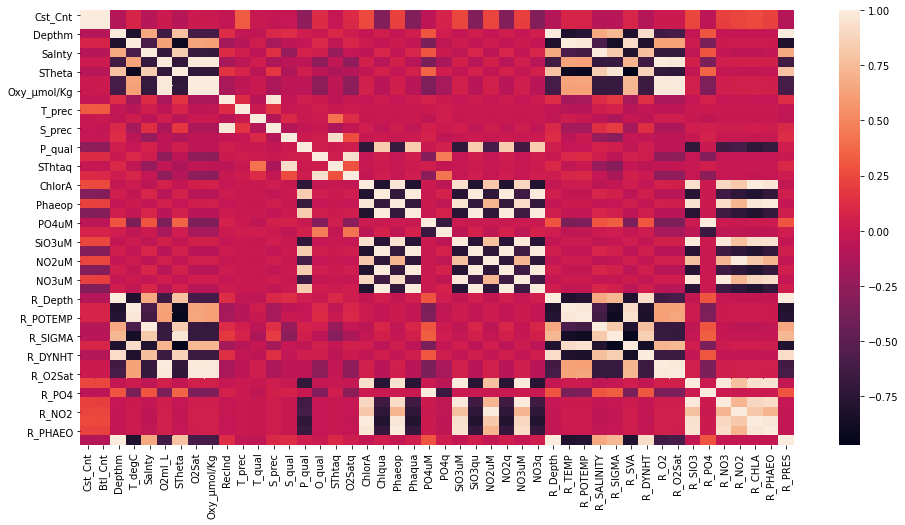

In [83]:
fig, ax  = plt.subplots(figsize=(16,8))
sns.heatmap(matrixCorrelacion) ## Se observa el mapa de calor por colo de las correlaciones presentes

In [91]:
## Funcion de automatización que permite seleccionar las variables que se relacionan con el target basado en un
## umbral de aceptacion

umbral = 0.6 ## un umbral aceptable 


def relacionFeatures(correlacionData, umbralSolicitado):
    feature = []
    valor = []
    for i, index in enumerate(correlacionData.index):
        if abs(correlacionData[index])>umbral : 
            feature.append(index)
            valor.append(correlacionData[index])     
    df = pd.DataFrame(data = valor, index=feature,columns=['Valor Correlacion'])
    return df

In [92]:
valorCorrelacion= relacionFeatures(matrixCorrelacion['R_SALINITY'],umbral)
valorCorrelacion ## Seleecion de los fea

,Valor Correlacion
Depthm,0.664055
Salnty,1.000000
O2ml_L,-0.687152
STheta,0.841171
O2Sat,-0.674486
Oxy_µmol/Kg,-0.691178
R_Depth,0.664055
R_POTEMP,-0.620928
R_SALINITY,1.000000
R_SIGMA,0.828945


In [88]:
dataCorrAceptada = data[valorCorrelacion.index] ## Se selecciona la variables de importancia en el dataframe
dataCorrAceptada.head()

,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,R_Depth,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,339.50555,33.440,2.096994,25.649,32.717039,89.370821,339.50555,10.50,33.440,25.64,233.0,0.549521,2.096994,32.700216,342.030417
1,8.00000,33.440,2.096994,25.656,32.717039,89.370821,8.00000,10.46,33.440,25.65,232.5,0.010000,2.096994,32.700216,8.000000
2,10.00000,33.437,2.096994,25.654,32.717039,89.370821,10.00000,10.46,33.437,25.65,232.8,0.020000,2.096994,32.700216,10.000000
3,19.00000,33.420,2.096994,25.643,32.717039,89.370821,19.00000,10.45,33.420,25.64,234.1,0.040000,2.096994,32.700216,19.000000
4,20.00000,33.421,2.096994,25.643,32.717039,89.370821,20.00000,10.45,33.421,25.64,234.0,0.040000,2.096994,32.700216,20.000000


## 4.- A continuación se ajustará el modelo de regresión lineal y predecir.
Para estimar los coeficientes se usará el método de <a href="https://www.varsitytutors.com/hotmath/hotmath_help/spanish/topics/line-of-best-fit">Mínimos Cuadrados.</a>. 


### X = dataF.drop['target'] (o variables independientes)
### Y = dataF['target']

### Las funciones importantes a tener en cuenta al ajustar un modelo de regresión lineal son:

**lm.fit()**     -> Ajusta a un modelo lineal

**lm.predict()** -> Predecir **$Y$** usando el modelo lineal con coeficientes estimados

**lm.score()**   -> Devuelve el <a href="https://www.addlink.es/noticias/minitab/2736-como-interpretar-un-modelo-de-regresion-con-bajo-coeficiente-de-determinacion-r-cuadrado-y-bajos-valores-p">coeficiente de determinación (R$^2$)</a>. 
 
 - [Una medida de cuán bien se replican los resultados observados por el modelo, 
como la proporción de la variación total de los resultados explicada por el modelo.]
    

### Por hacer
- Selección de Variables Dep e Ind.
- División Valores en bloques de Entrenamiento y Prueba
- Ajuste a modelo lineal
- Selección del modelo lineal
- Entrenamiento del modelo
- Impresión coeficientes e intersepción.
- Diagrama de Dispersión.

In [96]:
##Variable independiente
X = dataCorrAceptada.drop(['R_SALINITY','Salnty'], axis=1)  ##
##Variable Dependiente
Y = dataCorrAceptada['R_SALINITY']

In [97]:
x_train, x_test, y_train, y_test  = train_test_split(X,Y, test_size=0.2, random_state=0)

## 5.- Entrenamiento del Modelo

In [95]:
lm = LinearRegression()

In [98]:
ml = lm.fit(x_train,y_train)

In [100]:
print("Los coeficientes del modelo son: ", ml.coef_)
print("El punto de Inteseccion es : ",ml.intercept_)
print("Formula del modelo es : Y = {}*(x1) + {}*x2 + {} ".format(ml.coef_[0],ml.coef_[1],ml.intercept_))

Los coeficientes del modelo son:  [ 2.84467258e+09  9.45985719e+05  7.95040909e-01  3.08219939e-02
 -9.21690464e-03 -2.84467258e+09  1.90904569e-01  1.00947804e-01
 -2.94670463e-03  1.67213543e-01 -9.45985671e+05 -9.90627706e-03
  2.45795250e-02]
El punto de Inteseccion es :  9.237817964489444
Formula del modelo es : Y = 2844672581.4788203*(x1) + 945985.7189087868*x2 + 9.237817964489444 


In [102]:
y_predict = ml.predict(x_test)

In [103]:
d = {'Predicted':y_predict,'target':y_test}
df = pd.DataFrame(data=d)
df['Predicted'] = df['Predicted'].apply(lambda x: round(x,1))
df.head(10)

,Predicted,target
4696,33.7,33.680000
5543,34.0,34.020000
2584,34.4,34.380000
3075,34.3,34.307000
1891,34.2,34.156000
134,33.4,33.420000
4800,32.9,32.823332
5779,33.4,33.330000
558,33.1,33.029000
2913,33.9,33.982000


## 6.- Métricas y Evaluación del Modelo

In [104]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)

print('r2_score ',score)
print('MAE', mae)
print('MSE ',mse)

r2_score  0.9616984939564253
MAE 0.05475182384477754
MSE  0.011417580414691987


In [105]:
##Conclusiones

## 1. Se observa un puntaje R2 demasiado alto, esto es u comportamietno anomalo pero puede serdebido a la limpieza de los datos
## Se deben eliminar desde el principio las columnas con la valores 0, ya que ingresan ruido al estudio

## Igualmente el error obtenido es demasiado bajo, pero es puede ser debido a que el dataset de testeo puede tener errores de limpieza

## 7.- Pruebas con diferentes umbrales de correlación

In [106]:
total_features = []
##total_nombre_features = []
valor_correlacion = []
r2_valores = []
mse_valores = []
mae_valores = []

In [107]:
def metricas_evaluacion(features, umb, y_true, y_pred):
    puntuacion = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features.columns)-1)
    valor_correlacion.append(umb)
    r2_valores.append(puntuacion)
    mse_valores.append(mse)
    mae_valores.append(mae)
    
    dfMetricas = pd.DataFrame(data=[total_features,valor_correlacion,r2_valores,mse_valores,mae_valores],
                             index=['#features','Umbral','R2','MSE','MAE'])

    return dfMetricas.T

In [108]:
metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict)

,#features,Umbral,R2,MSE,MAE
0,14.0,0.6,0.961698,0.011418,0.054752


In [110]:
### Ahora con un umbral menor

In [113]:
umbral = 0.20
valorCorrelacion = relacionFeatures(matrixCorrelacion['R_SALINITY'], umbral)
valorCorrelacion

,Valor Correlacion
Depthm,0.664055
T_degC,-0.584558
Salnty,1.000000
O2ml_L,-0.687152
STheta,0.841171
O2Sat,-0.674486
Oxy_µmol/Kg,-0.691178
S_qual,-0.220006
SThtaq,-0.218891
PO4uM,0.293301


In [117]:
dataCorrAceptada = data[valorCorrelacion.index]
dataCorrAceptada.tail()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,S_qual,SThtaq,PO4uM,...,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PO4,R_PRES
6932,42.0,10.26,32.758,5.79,25.159,90.8,252.2354,0.371054,0.430301,0.98,...,10.26,10.26,32.758,25.15,280.5,0.13,5.79,90.8,0.98,42.0
6933,50.0,9.96,32.885,5.40,25.309,84.2,235.2110,0.371054,0.430301,1.16,...,9.96,9.95,32.885,25.30,266.4,0.15,5.40,84.2,1.16,50.0
6934,52.0,9.91,32.930,5.33,25.352,83.1,232.1523,0.371054,0.430301,1.20,...,9.91,9.90,32.930,25.35,262.3,0.16,5.33,83.1,1.20,52.0
6935,62.0,10.07,33.339,5.62,25.645,88.1,244.7135,0.371054,0.430301,1.33,...,10.07,10.06,33.339,25.64,234.8,0.18,5.62,88.1,1.33,62.0
6936,71.0,9.48,33.552,4.87,25.909,75.5,212.0014,0.371054,0.430301,1.62,...,9.48,9.47,33.552,25.90,209.8,0.20,4.87,75.5,1.62,71.0


In [123]:
## Entrenamiento automatico dado el "dataCorrAceptada" por su umbral

def obtener_y_predict(data_Correlacionado):
    X = dataCorrAceptada.drop(['R_SALINITY','Salnty'], axis = 1)
    y = dataCorrAceptada['R_SALINITY']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_predict = modelo.predict(X_test)
    
    return y_predict

In [124]:
y_predict = obtener_y_predict(dataCorrAceptada)

In [125]:
metricas_evaluacion(dataCorrAceptada,umbral, y_test, y_predict)

,#features,Umbral,R2,MSE,MAE
0,14.0,0.6,0.961698,1.141758e-02,5.475182e-02
1,20.0,0.2,1.000000,4.088800e-28,1.631484e-14
2,20.0,0.2,0.979376,6.147850e-03,4.174115e-02
